# Phase Diagrams of Galapagos Gabbros

- Given a set composition we can use `ptt` to assess the phase stability at different P-T conditions to construct a phase diagram.
- These calculations can be performed with either the MELTS or Holland & Powell family of thermodynamic models (through MAGEMin).
- In this example we'll recreate some phase diagrams used to constrain the storage conditions of chemical equilibated gabbroic cumualtes from the island of Floreana in the Galapagos Archipelago (Gleeson et al. 2025).

**Before any calculations can be run** users need to download the alphaMELTS for MATLAB files and/or install the MAGEMinCalc and juliacall packages. Please see the installation guide on ReadTheDocs.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PetThermoTools as ptt

%matplotlib widget

In [3]:
######## RUN twice if using MacOS, ignore if using Windows #########
import sys
import os
sys.stdout = open(os.devnull, 'w')
sys.stderr = open(os.devnull, 'w')

The composition below represents the gabbro sample 17MMSG03b - as determined by EDS mapping - from Gleeson et al. (2025).

In [4]:
bulk_03b = {'SiO2': 47.342,
            'TiO2': 0.338,
            'Al2O3': 17.5,
            'Cr2O3': 0.106,
            'FeOt': 5.982,
            'MgO': 13.214,
            'CaO': 13.975,
            'Na2O': 1.368,
            'K2O': 0.149,
            'Fe3Fet': 0.10}

Using `PetThermoTools` we can use both pMELTS and Green et al. (2025) thermodynamic models to assess the conditions where the orthopyroxene - plagioclase - clinopyroxene - spinel assemblage observed in this sample is stable.

In [5]:
Res_pMELTS = ptt.phaseDiagram_calc(Model = "pMELTS",
    bulk=bulk_03b,P_bar=np.linspace(1000.0,12000.0,100),
    T_C = np.linspace(950.0,1400.0,100))

In [ ]:
Res_Green = ptt.phaseDiagram_calc(Model = "Green2025", 
    bulk=bulk_03b,P_bar=np.linspace(1000.0,12000.0,100),
    T_C=np.linspace(950.0,1400.0,100))

We can then examine the phase diagrams using the in-built `plot_phaseDiagram` function.

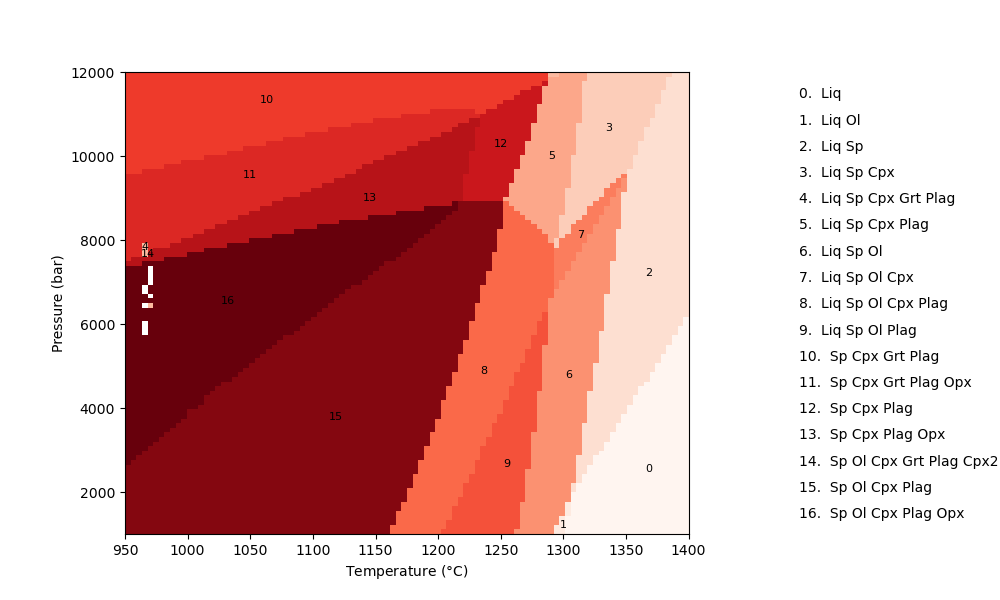

(<Figure size 1000x600 with 2 Axes>,
 array([<Axes: xlabel='Temperature ($\\degree$C)', ylabel='Pressure (bar)'>,
        <Axes: >], dtype=object))

In [ ]:
ptt.plot_phaseDiagram(Combined=Res_pMELTS)

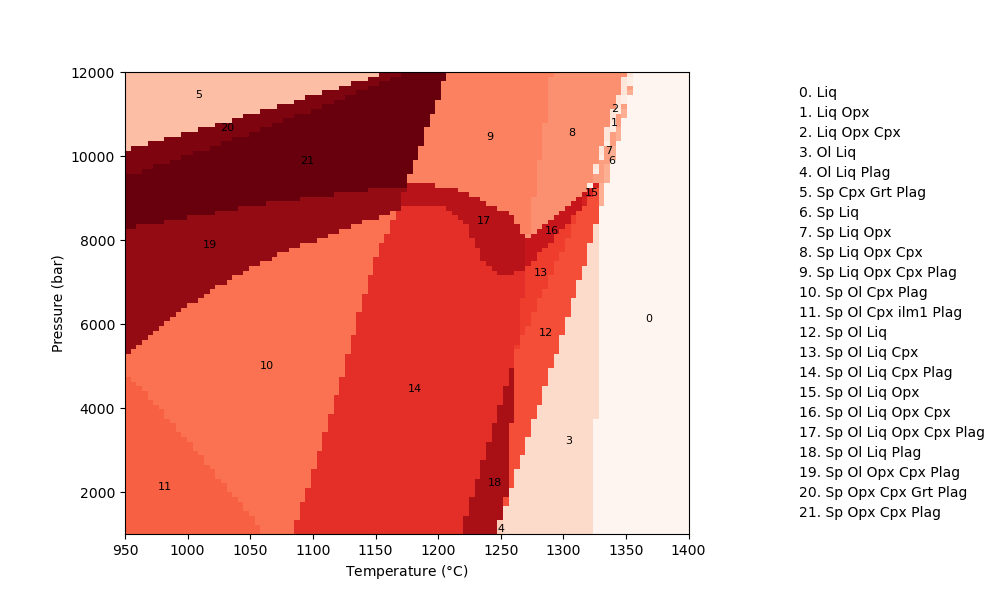

In [ ]:
ptt.plot_phaseDiagram(
    Combined=Res_Green)

We can also examine differences in the predicted mineral compositions. One way to do this is to use Thermobar (Wieser et al. 2023) to plot the clinopyroxene and orthophyroxene data on a pyroxene quadrilateral.

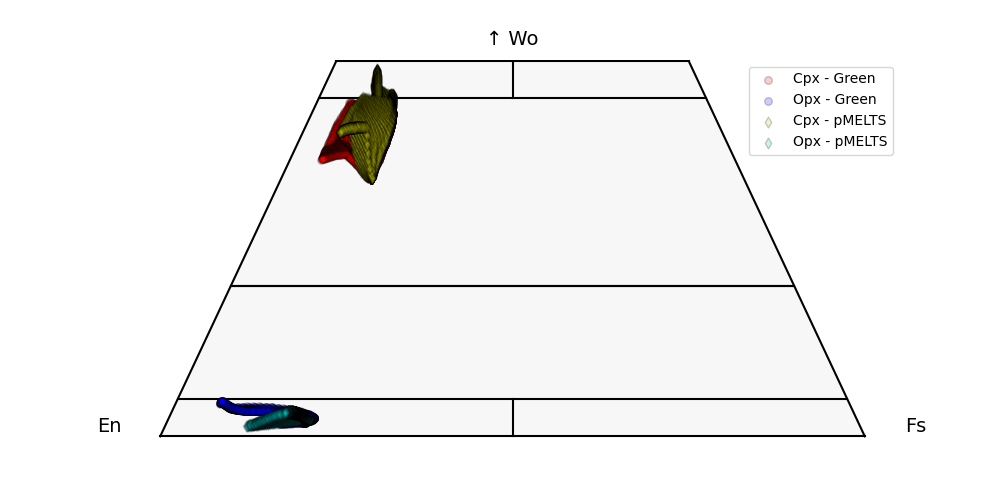

In [ ]:
import Thermobar as pt

fig, tax = pt.plot_px_classification(
    figsize=(10,5))

cpx_comps_tern_green = pt.tern_points_px(
    px_comps=Res_Green.loc[:,
        Res_Green.columns.str.contains('_Cpx')])
tax.scatter(cpx_comps_tern_green, ec = 'k',
    marker = 'o', facecolor = 'r', s = 30,
    label = 'Cpx - Green', alpha = 0.2)

opx_comps_tern_green = pt.tern_points_px(
    px_comps=Res_Green.loc[:,
        Res_Green.columns.str.contains('_Opx')])
tax.scatter(opx_comps_tern_green, ec = 'k',
    marker = 'o', facecolor = 'b', s = 30,
    label = 'Opx - Green', alpha = 0.2)

cpx_comps_tern_melts = pt.tern_points_px(
    px_comps=Res_pMELTS.loc[:, Res_pMELTS.columns.str.contains('_Cpx')])
tax.scatter(cpx_comps_tern_melts, ec = 'k',
    marker = 'd', facecolor = 'y', s = 30,
    label = 'Cpx - pMELTS', alpha = 0.2)

opx_comps_tern_melts = pt.tern_points_px(
    px_comps=Res_pMELTS.loc[:, Res_pMELTS.columns.str.contains('_Opx')])
tax.scatter(opx_comps_tern_melts, ec = 'k',
    marker = 'd', facecolor = 'c', s = 30,
    label = 'Opx - pMELTS', alpha = 0.2)

tax.legend()